# Linear Regression with Batch Gradient Descent

You will train your model using a real world dataset.  The dataset contains a collection of real estate listings in San Luis Obispo county.

https://wiki.csc.calpoly.edu/datasets/wiki/Houses

To make it simpler for this assignment, the dataset has been slightly modified.  It contains the following fields:

1.	MLS: Multiple listing service number for the house (unique ID).
2.	Price: the most recent listing price of the house (in dollars).
3.	Bedrooms: number of bedrooms.
4.	Bathrooms: number of bathrooms.
5.	Size: size of the house in square feet.
6.	Price/SQ.ft: price of the house per square foot.

The model predict the housing price given the square footage of the house.


In [2]:
import numpy as np
import pandas as pd
import numpy.matlib
import matplotlib.pyplot as plt

# read dataset
df = pd.read_csv("housing_price_data.csv")

df.head()

MPLS   Price  Bedrooms  Bathrooms  Size  PriceSq
0  132842  795000         3          3  2371   335.30
1  134364  399000         4          3  2818   141.59
2  135141  545000         4          3  3032   179.75
3  135712  909000         4          4  3540   256.78
4  136282  109900         3          1  1249    87.99

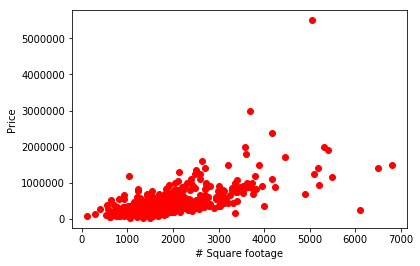

In [3]:
# Plot data points
X, y = (df["Size"].values,df["Price"].values)
X = X.reshape(len(X),1)
y = y.reshape(len(y),1)

# plots the data points
plt.plot(X, y, 'ro')
plt.xlabel("# Square footage")
plt.ylabel("Price")
plt.show()

In [4]:
# Normalize the house size, e.g., divide by (mx-min) to ensure the scale is compatible with the bias, which is 1
normalize = X.max(0) - X.min(0)
X =  X / normalize

# Add bias
z = np.ones((len(X),1)) 
X = X.reshape(len(X),1)
X = np.concatenate((z,X), axis=1)                
y = y.reshape(len(X),1) 

# sort for testing/plotting
Xsort = np.sort(X, axis=0)

## Perform gradient descent

In [7]:
# Initialize vector w 
w = np.random.rand(2,1)
print(w)

# Learning rate 
# made nu much smaller than .01, my method did not converge at .01
nu = 0.0000005

# Number of iterations 
MAX_ITR = 20

mse = []         

l = len(y)


# Loop for 2000 iterations
for itr in range (0, MAX_ITR):
    # Form W matrix -- this is to avoid having another for loop but if you don't to use it, thats ok
    W = (np.matlib.repmat(w.transpose(),3,1))   # 781x2
    
    msesigma = 0 
    sigma0 = 0
    sigma1 = 0
    
    # TO DO: write update equation
    #need to multiply every xi, yi value with w, then set temporary variable to the prev value times the sum

    #find the sigma term for w0, w1, and also for mse to save time later
    for i in range(0, len(df["Size"])):
        sigma0 = sigma0 + (w[0] + w[1] * X[i][1] - y[i])
        sigma1 = sigma1 + (w[0] + w[1] * X[i][1] - y[i])* w[1]
        msesigma = msesigma + (w[0] + w[1] * X[i][1] - y[i]) ** 2
            
            
    #update the w0 and w1 after sigma is calculated
    w0temp = w[0] - (nu/l) * sigma0
    w1temp = w[1] - (nu/l) * sigma1
    
   # print(w[1])
    
    w[0] = w0temp
    w[1] = w1temp
    
    
    # TO DO: find predicted value yhat and compute MSE   
    #add the mse term using the calculated mse sigma above
    mse.append((1/(2 * l)) * msesigma)
    

    
    


# final w[0], w[1] after 2000 iterations of updating:
print(w[0])
print(w[1])
    
print(W)

[[0.91852999]
 [0.02001192]]
[4.75179325]
[0.66735811]
[[4.56013105 0.56002289]
 [4.56013105 0.56002289]
 [4.56013105 0.56002289]]


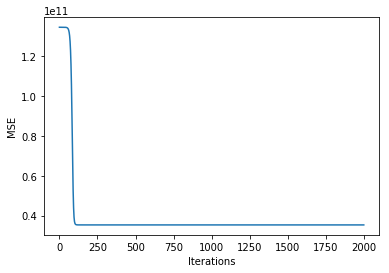

In [5]:
### Plot MSE vs iterations
plt.plot(mse)  #
plt.xlabel("Iterations")
plt.ylabel("MSE")
plt.show()

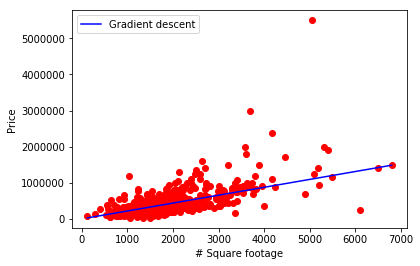

In [6]:
### Plot the fitted curve

yhat = np.dot(np.sort(X, axis=0),w)

plt.plot(X[:,1] * normalize, y, 'ro')
plt.plot(Xsort[:,1] *normalize , yhat, 'b', label="Gradient descent")
plt.legend()
plt.xlabel("# Square footage")
plt.ylabel("Price")
plt.show()
